Carga del dataset FIFA20

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
fifa20_df= pd.read_csv('https://raw.githubusercontent.com/GasparGarcia/diplo/main/players_20.csv')

Carga de librerías y herramientas

In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
import itertools
import warnings
warnings.filterwarnings("ignore")
import io

In [ ]:

from plotly.offline import init_notebook_mode, plot,iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import seaborn as sns

Replicando la preparación de la base de datos hecha a FIFA19, se eliminan del dataset jugadores con Overall Skills < 70, y se consideran como features las variables de desmpeño por habilidad (skill_ratings)

In [ ]:
fifa20_df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,...,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,...,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,...,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,...,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,...,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Selfish

Text(0.5, 0, 'Overall Ratings')

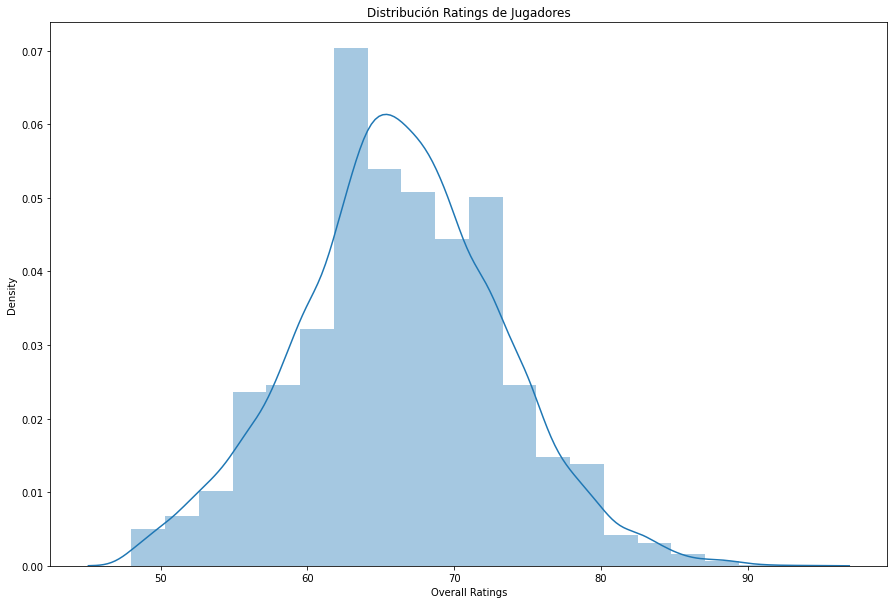

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(fifa20_df.overall, bins=20);
plt.title('Distribución Ratings de Jugadores')
plt.xlabel('Overall Ratings')

La distriubución de los Overall Ratings tiene apariencia normal.

In [ ]:

n=10000

fifa20_df= fifa20_df.loc[:n] #los primeros n
fifa20_df= fifa20_df[(fifa20_df['overall']>70)] # mejores jugadores

skills_ratings = ['short_name', 'player_positions', 'attacking_crossing', 
                  'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 
                  'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 
                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 
                  'defending_marking', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 
                  'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']

print(len(skills_ratings))

df_skills=fifa20_df[skills_ratings]

36


Obtenemos una etiquetas que nos serviran más adelante.

In [ ]:
df_skills["player_positions"]

0       RW, CF, ST
1           ST, LW
2          LW, CAM
3               GK
4           LW, CF
           ...    
4751           CAM
4752            ST
4753       CDM, CM
4754       CDM, CM
4755       CDM, CB
Name: player_positions, Length: 4756, dtype: object

Extraemos la mejor posición de juego del jugador (asumiendo que la primera posición es la mejor)


In [ ]:
df_skills['best_pos'] = df_skills['player_positions'].str.split(',').str[0]
df_player = df_skills[df_skills['best_pos']!= 'GK'].copy()

df_skills[["short_name","best_pos"]].head()

,short_name,best_pos
0,L. Messi,RW
1,Cristiano Ronaldo,ST
2,Neymar Jr,LW
3,J. Oblak,GK
4,E. Hazard,LW


In [ ]:
df_skills['best_pos'].isna().sum()

0

In [ ]:
Mediocampo=['RCM','LCM','LDM','CAM','CDM','LAM','RDM','CM','RAM','CF']
Delantero=  ['RF', 'ST', 'LW', 'LF', 'RS', 'LS', 'RM', 'LM','RW'] 
Defensor=['RCB','CB','LCB','LB','RB','RWB','LWB']
Arquero=['GK']

def pos2(player_positions):
    if player_positions in Delantero:
        return 'Delantero'
    
    elif player_positions in Mediocampo:
        return 'Mediocampo'
    
    elif player_positions in Defensor:
        return 'Defensor'
    
    elif player_positions in Arquero:
        return 'Arquero'
    

df_skills["Position2"]=df_skills["best_pos"].apply(lambda x: pos2(x))


In [ ]:
df_skills[["short_name","Position2"]].head()

,short_name,Position2
0,L. Messi,Delantero
1,Cristiano Ronaldo,Delantero
2,Neymar Jr,Delantero
3,J. Oblak,Arquero
4,E. Hazard,Delantero


Se generan 4 posiciones desde los datos originales, arquero, defensor, mediocampista y delantero.



In [ ]:
df_skills["Position2"].isna().sum()

0

In [ ]:
posicion=df_skills["Position2"]
len(posicion)

4756

In [ ]:
df_skills= df_skills.drop(['short_name', 'player_positions', 'best_pos', 'Position2'], axis=1)

Tanto para Kmeans como para PCA es necesario escalar los datos. Es necesario que los datos estén en la misma escala dado que mayor varianza implica mayor peso relativo, generando distorsiones. Primero se observan las distribuciones de los skills.

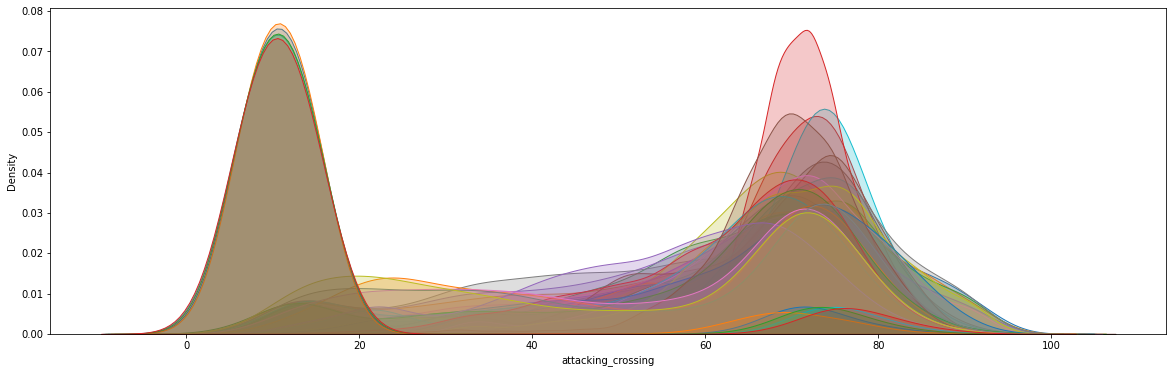

In [ ]:
plt.figure(figsize=(20,6))
for col in df_skills.columns:
    sns.kdeplot(df_skills[col], shade=True)


See aprecia que la mayoría de los features no están en la misma escala  y la mayoría de los features son asimétricos hacia la izquierda. Probamos las siguientes tecnicas de escalamiento.

- Log Scaling

- Min-Max Scaling

- Standard Scaling

In [ ]:
habilidades = list(df_skills.columns)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler= StandardScaler()
minmax = MinMaxScaler()
#1
log_skills = np.log(df_skills)
#2
scaled_skills = scaler.fit_transform(df_skills)
scaled_skills_df= pd.DataFrame(scaled_skills, columns= habilidades)
#3
minmax_skills = minmax.fit_transform(df_skills)
minmax_skills = pd.DataFrame(minmax_skills, columns= habilidades)

In [ ]:
def plot_transformed_data(data):
    plt.figure(figsize=(20,6))
    for col in data.columns:
        sns.kdeplot(data[col], shade=True)
    

Gráfico features escalados logarítmicamente

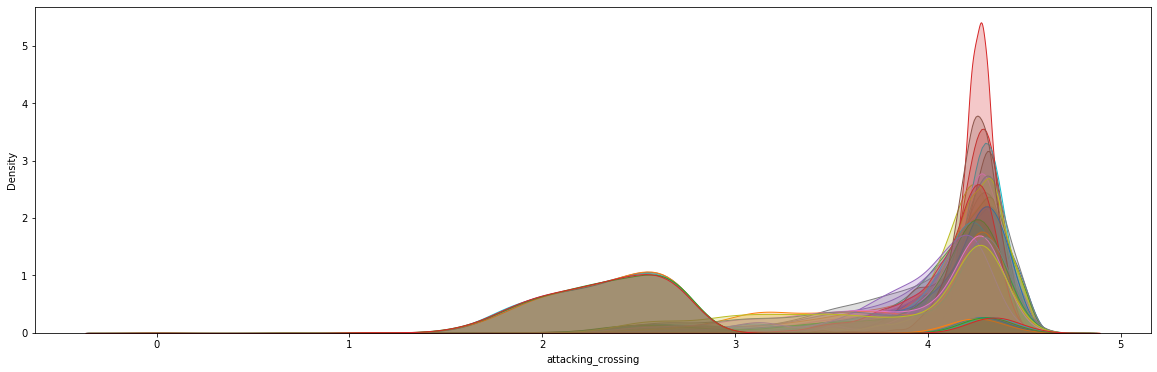

In [ ]:
plot_transformed_data(log_skills)

Gráfico datos estandarizados.

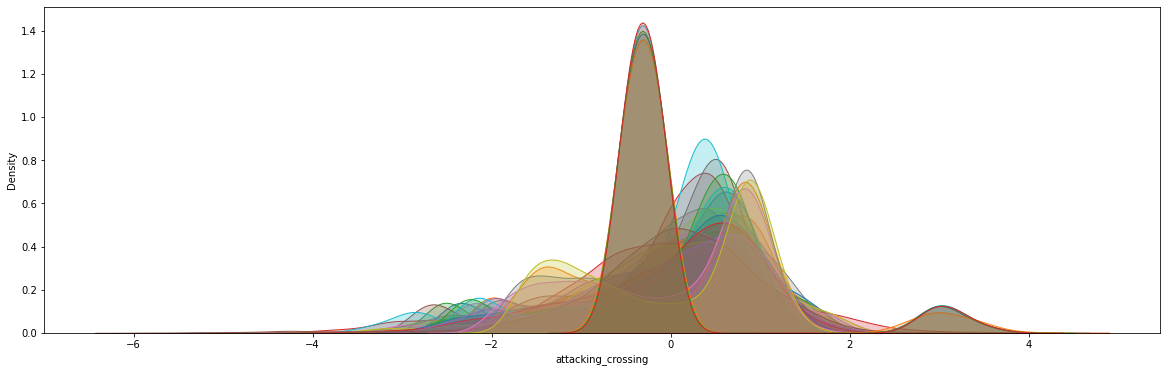

In [ ]:
plot_transformed_data(scaled_skills_df)

Gráfico datos escalados con MinMax

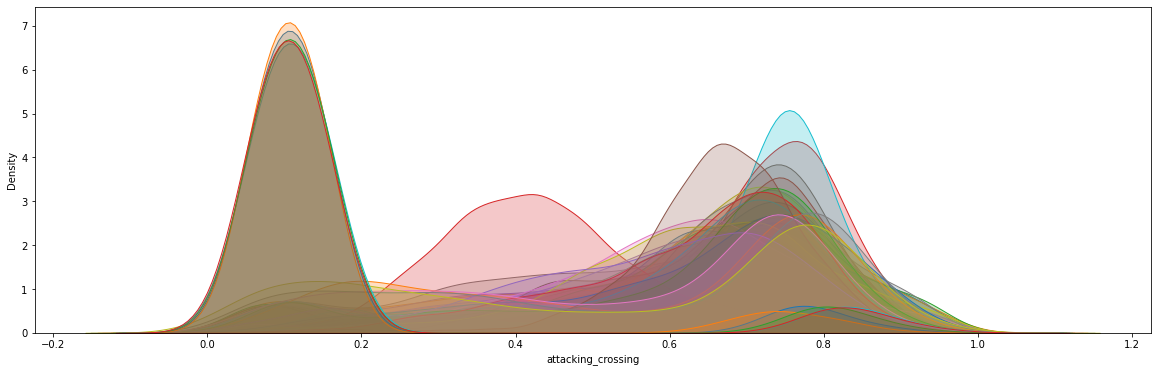

In [ ]:
plot_transformed_data(minmax_skills)

### Análisis de Clustering con Kmeans

Decidimos utilizar los datos estandarizados de aquí en adelante. 

Buscamos cantidad ótpima de clusters.

Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

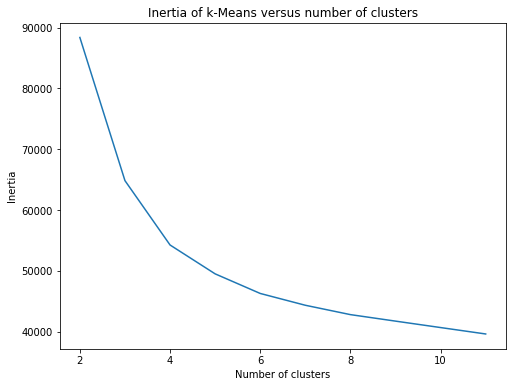

In [ ]:
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(scaled_skills).inertia_ for i in range(10)]

from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

El número optimo de clusters puede ser 3 o 4 de acuerdo a como se interprete el codo.

In [ ]:
# Número de clusters buscado
n_clust = 4

km = KMeans(n_clusters=n_clust)
km.fit(scaled_skills)

# Recuperacion de etiquetas
clusters = km.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  54243.910510403075


In [ ]:
df_labels = pd.DataFrame({"labels": clusters, "position": posicion })


In [ ]:
tabla=pd.crosstab(df_labels.labels, df_labels.position)
tabla

position,Arquero,Defensor,Delantero,Mediocampo
labels,,,,
0,0,634,113,944
1,440,0,0,0
2,0,837,1,84
3,0,0,1349,354


Utilizando Kmeans, con 4 clusters (óptimo), se tiene que el label 3 es asignado a Defensores (con cierto overlapping de mediocampistas), el label 1 es completamente asignado a Arqueros, el label 2 se asigna mayoritariamente a Delanteros (con alrededor de un 25% de overlapping de mediocampistas) y el label 0 es el más debilmente definido, se atribuye mayoritariamente a mediocampistas pero una porción significativa a defensores y otra porción menor va a delanteros.

Como conclusión parcial se puede decir que el algoritmo Kmeans tiene problemas agrupando a mediocampistas dado que estos se confunden con Defensores y en menor medida con Delanteros. En términos empíricos esto tiene sentido dado que muchos mediocampistas (como por ejemplo el argentino Mascherano) han jugado históricamente en ambas posiciones.

Estos hechos estilizados se pueden observar en el siguiente gráfico. En general, sin importar que combinación de variables se utilice se llega a que los arqueros quedan claramente separados y los mediocampistas quedan entremedio de defensores y delanteros generando confusión en el algoritmo.


In [ ]:
from IPython.display import HTML

data=[]
bool_crack=fifa20_df["overall"] > 85
bool_no_crack=fifa20_df["overall"]<86


#Eligo dos números entre 0 y  de n_skills-1
skill_1=skills_ratings[9]
skill_2=skills_ratings[10]


kmean_clusters = go.Scatter(x=df_skills[skill_1], y=df_skills[skill_2],
                           mode='markers',
                        text=fifa20_df.loc[:,'short_name'],
                           marker=dict(
                                size=5,
                                color = clusters.astype(np.float), #set color equal to a variable
                                colorscale='Portland',
                                showscale=False)
                           )

crack =go.Scatter(x=df_skills.loc[bool_crack,skill_1], y=df_skills.loc[bool_crack,skill_2],name='Ckacks!!',
                      text=fifa20_df.loc[bool_crack,'short_name'],
                      textfont=dict(family='sans serif',size=10,color='black'),
                      opacity=0.9,mode='text')

data=[kmean_clusters,crack]

layout = go.Layout(title="Clustering K means ",titlefont=dict(size=20),
                xaxis=dict(title=skill_1),
                yaxis=dict(title=skill_2),
                autosize=False, width=1000,height=1000)

fig = go.Figure(data=data, layout=layout)

HTML(fig.to_html())
#iplot(fig)


For n_clusters = 2 The average silhouette_score is : 0.5957737272228949
For n_clusters = 3 The average silhouette_score is : 0.29628846802017295
For n_clusters = 4 The average silhouette_score is : 0.25401430003118686
For n_clusters = 5 The average silhouette_score is : 0.244643909392365
For n_clusters = 6 The average silhouette_score is : 0.21016961276077561


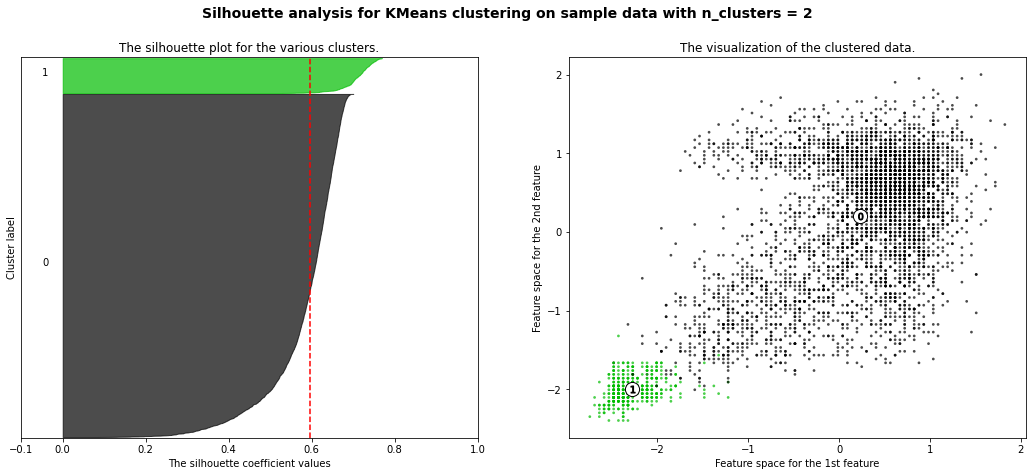

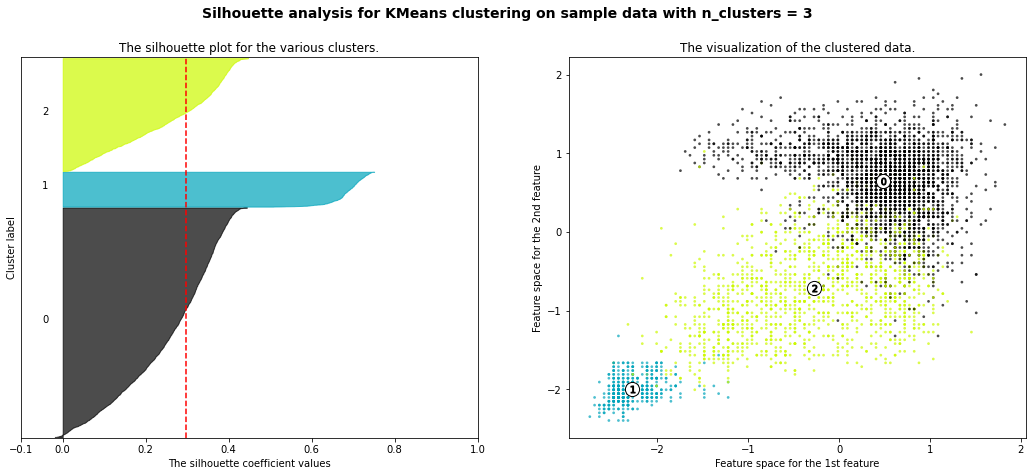

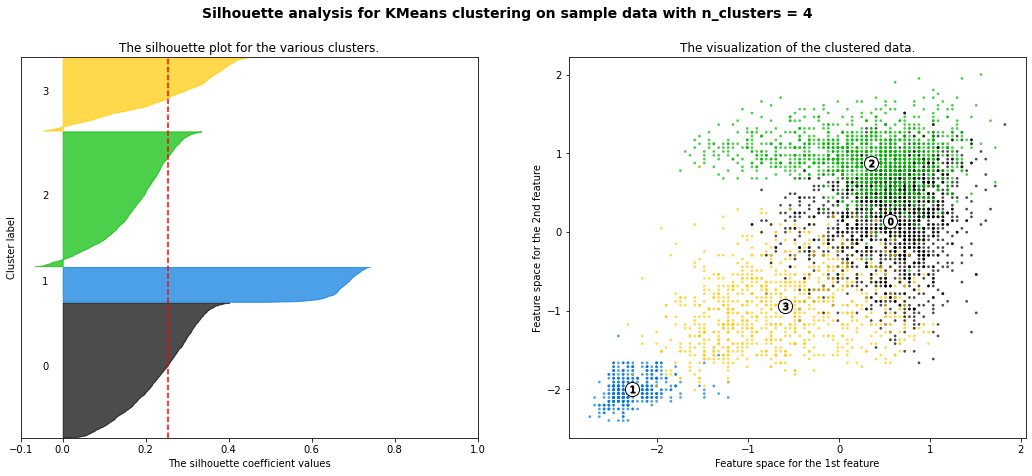

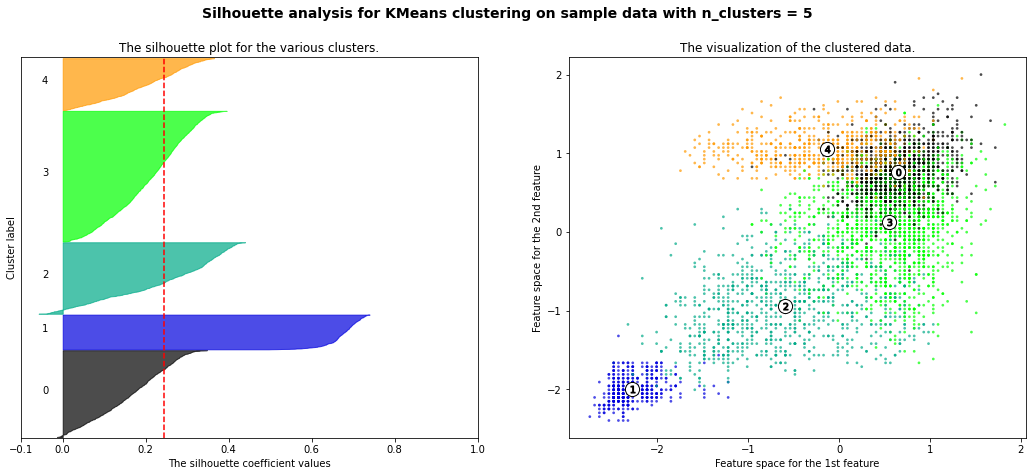

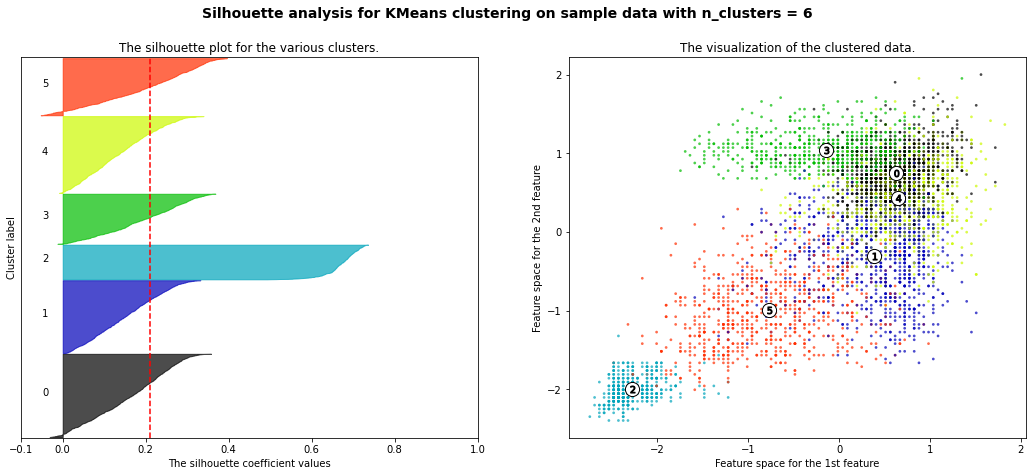

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X= scaled_skills

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

Anterioremnte se observó el gráfico de Silueta.

En el gráfico de silueta correspondiente a 4 clusters se obtienen resultados similares a los de la tabla de labels/posiciones:
En primer lugar, el label 1, asignado a Arqueros, muestra muy buenos coeficientes de silueta para todos los jugadores en esa posición.
En calidad le sigue el cluster 3, asignado a delanteros, con una pequeña proporcón de jugadores mal clasificados como mediocampistas (o vicerversa, es decir, mediocampistas asigandos como delanteros).
Luego le sigue el cluster 2, que representa a los defensores, tambíen mostrandoo un porción de jugadores mal clasificados y otra proporción de jugadores debilmente clasificados.
Por último el cluster 0, asignado a mediocampistas. Se observa que este es el de mayor tamaño relativo.

## Mean Shift

In [ ]:
#@title Texto de título predeterminado
from sklearn.cluster import KMeans,MeanShift
from sklearn import decomposition

for bandw in np.arange(2.5, 5, 0.5):

  ms = MeanShift(bandwidth=bandw, bin_seeding=True)

  ms.fit(scaled_skills, y=None)

  clusters2 = ms.labels_
  cluster_centers = ms.cluster_centers_

  labels_unique = np.unique(clusters2)
  n_clusters_ = len(labels_unique)

  print("Numero estimado de clusters para Mean Shift : %d" % n_clusters_)

# Etquetas de los elementos de los clusters

Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 2
Numero estimado de clusters para Mean Shift : 1
Numero estimado de clusters para Mean Shift : 1
Numero estimado de clusters para Mean Shift : 1


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import metrics
from sklearn.datasets import make_blobs




In [ ]:
bandwidth = estimate_bandwidth(scaled_skills, quantile=0.3, n_samples=1000)
print(bandwidth)

5.904822065383644


De acuerdo a MeanShift, el número óptimo de cluster dada la bandwidth estimada es de 1.

In [ ]:
# Fit Mean Shift with Scikit
ms = MeanShift(bandwidth=2.5, bin_seeding=True)
ms.fit(scaled_skills)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)



In [ ]:
# Predict the cluster for all the samples
P = ms.predict(scaled_skills)

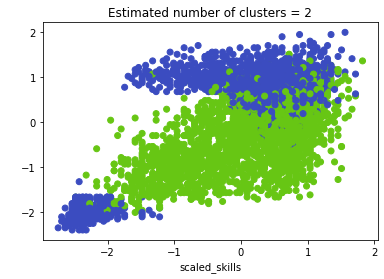

In [ ]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', labels))
plt.scatter(scaled_skills[:,0], scaled_skills[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('scaled_skills')
plt.ylabel(' ')
plt.show()

No obtenemos resultados muy claros con MeanShift, tuvimos varios problemas para ejecutar un gráfico que no nos genere errores. Si es posible nos vendsrían re bien recomendaciones o que nos aclaren bien como se aplica este algoritmo.

## Hierarchical Clustering

Seleccionamos los top players para tener una mejor observación del dendrograma.

In [ ]:
top_players= fifa20_df[fifa20_df['overall']>85] # mejores jugadores

skills_top=top_players[skills_ratings]

#Standarización de los datos

skills_top_scaled = scaler.fit_transform(skills_top)

skills_top_scaled = pd.DataFrame(skills_top_scaled)

In [ ]:
names = top_players["short_name"].tolist()
len(names), len(skills_top_scaled)

(73, 73)

In [ ]:
import scipy 
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram


Probando distintos linkages
- Complete

- Avarage

- Single

- Weighted

- Centroid

### Complete Linkage

In [ ]:
complete= scipy.cluster.hierarchy.linkage(skills_top_scaled, method='complete', metric='correlation', optimal_ordering=False)

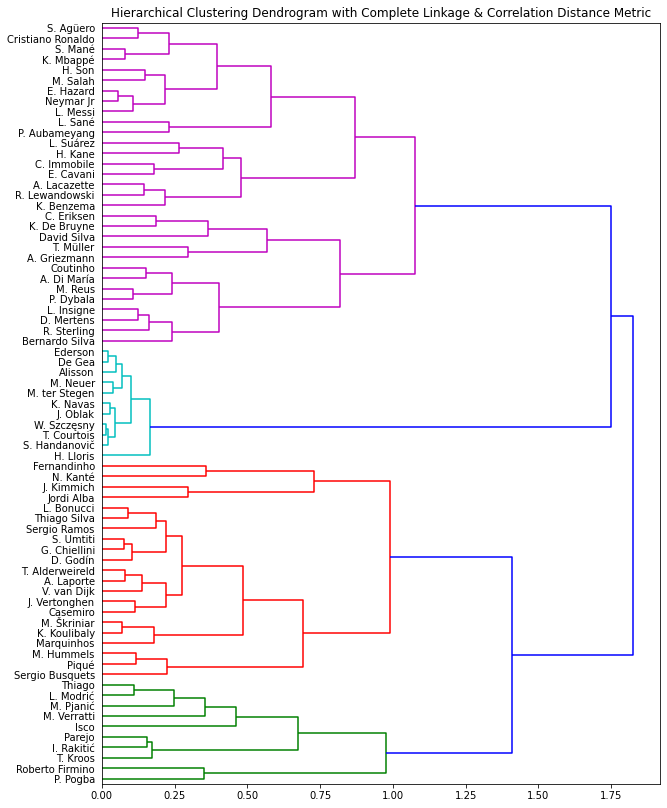

In [ ]:
plt.figure(figsize=(10,14))
#1

plt.title('Hierarchical Clustering Dendrogram with Complete Linkage & Correlation Distance Metric')

complete_dendrogram = scipy.cluster.hierarchy.dendrogram(complete, labels=names, leaf_font_size=10, orientation='right')

Resultados Complete Linkage con diversas métricas.
Utilizando métrica Euclídea/Minkowski se obtienen 3 clusters que diferencian 1: Arqueros, 2: Defensores, 3: Mediocampistas + Delanteros.

Con métrica CityBlock sólo agrupa a Arqueros por un lado y Resto de las Posiciones por el otro.

Con métrica Correlation se agrupan los datos en las 4 posiciones, dando el mejor resultado!



### Average Linkage

In [ ]:
average= scipy.cluster.hierarchy.linkage(skills_top_scaled, method='average', metric='correlation', optimal_ordering=False)

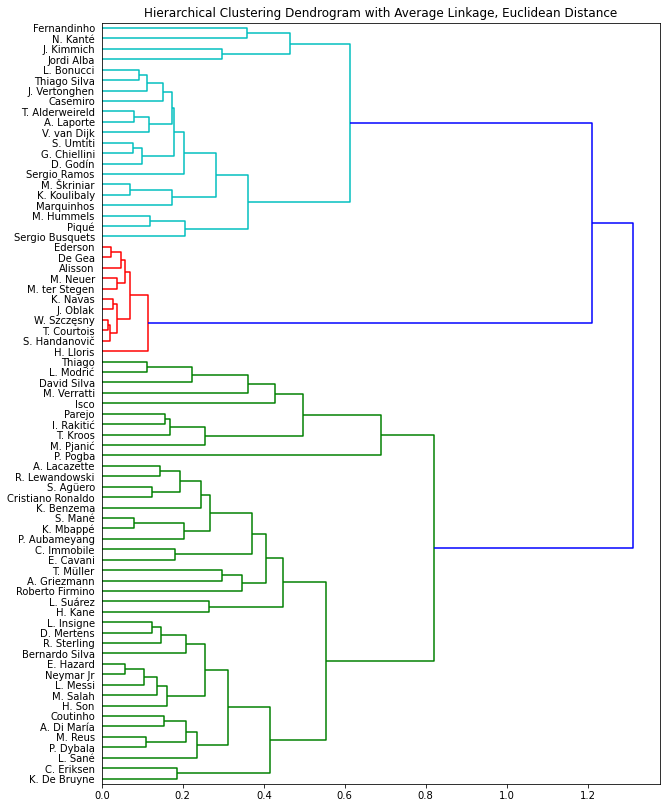

In [ ]:
plt.figure(figsize=(10,14))
#1

plt.title('Hierarchical Clustering Dendrogram with Average Linkage, Euclidean Distance')

average_dendrogram = scipy.cluster.hierarchy.dendrogram(average, labels=names, leaf_font_size=10, orientation='right')

Bajo métricas Euclídea/Minkowski/Cityblock Average Linkage sólo diferencia arqueros de otros jugadores. Lo mismo se encuentra para los restantes linkages (weighted, single, centroid).

Bajo métrica Corelation encuentra tres grupos o posiciones (mismo que Complete Linkage con métrica Euclídea)



Conclusión: Complete linkage, utilizando Correlation como métrica, 
parece ser el que mejor agrupa a los jugadores

## Principal Components Analysis

In [ ]:
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.decomposition.pca import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn import decomposition
random_state = 0
np.random.seed(0) 

Usando los features estandarizados.

In [ ]:
#PCA
pca = PCA(n_components=8, random_state=1).fit(scaled_skills_df)
    
dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
components = pd.DataFrame(np.round(pca.components_, 4), columns = list(scaled_skills.columns))
components.index = dimensions

In [ ]:
components.T

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8
attacking_crossing,-0.2076,-0.0497,-0.1322,0.0851,0.0527,0.0796,-0.0858,0.0499
attacking_finishing,-0.1886,-0.1836,0.1866,-0.0615,-0.0026,-0.0168,-0.0128,0.0317
attacking_heading_accuracy,-0.1475,0.2039,0.2658,-0.2108,-0.0882,-0.1079,0.1077,0.1202
attacking_short_passing,-0.2204,0.0572,-0.0119,0.1003,0.0428,-0.0664,0.0669,-0.1276
attacking_volleys,-0.1892,-0.1607,0.1963,0.0050,-0.0095,0.0386,0.0286,0.1237
skill_dribbling,-0.2242,-0.0731,-0.0309,-0.0292,0.0144,-0.0724,-0.0131,-0.0469
skill_curve,-0.2042,-0.1118,-0.0068,0.1164,0.0808,0.1483,-0.0177,0.1037
skill_fk_accuracy,-0.1847,-0.1081,0.0490,0.1780,0.1579,0.2767,0.0258,0.1305
skill_long_passing,-0.1887,0.0998,-0.0855,0.2483,0.1001,0.0829,0.0389,-0.2718
skill_ball_control,-0.2288,-0.0113,0.0147,-0.0040,0.0260,-0.0893,0.0647,-0.0461


Scree Plot

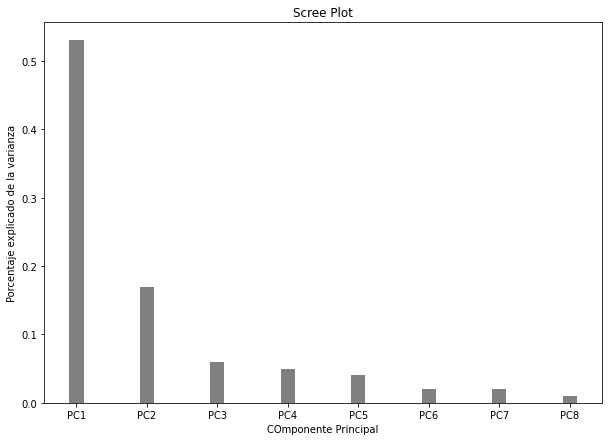

In [ ]:
import numpy as np
# PCA explained variance
per_var= np.round(pca.explained_variance_ratio_, decimals=2)
labels= ["PC" + str(x) for x in range(1, len(per_var)+1)]
x_ix1= np.arange(1, len(per_var)+1)

plt.figure(figsize=(10,7))
plt.bar(x_ix1, height= per_var, tick_label=labels, color="grey", width=0.2)
plt.ylabel("Porcentaje explicado de la varianza")
plt.xlabel("COmponente Principal")
plt.title("Scree Plot")
plt.show()

Se observa que entre los primeros 2 componentes explican las mayor parte de la variabilidad de los datos.

Gráfico pesos de los features en cada componente.

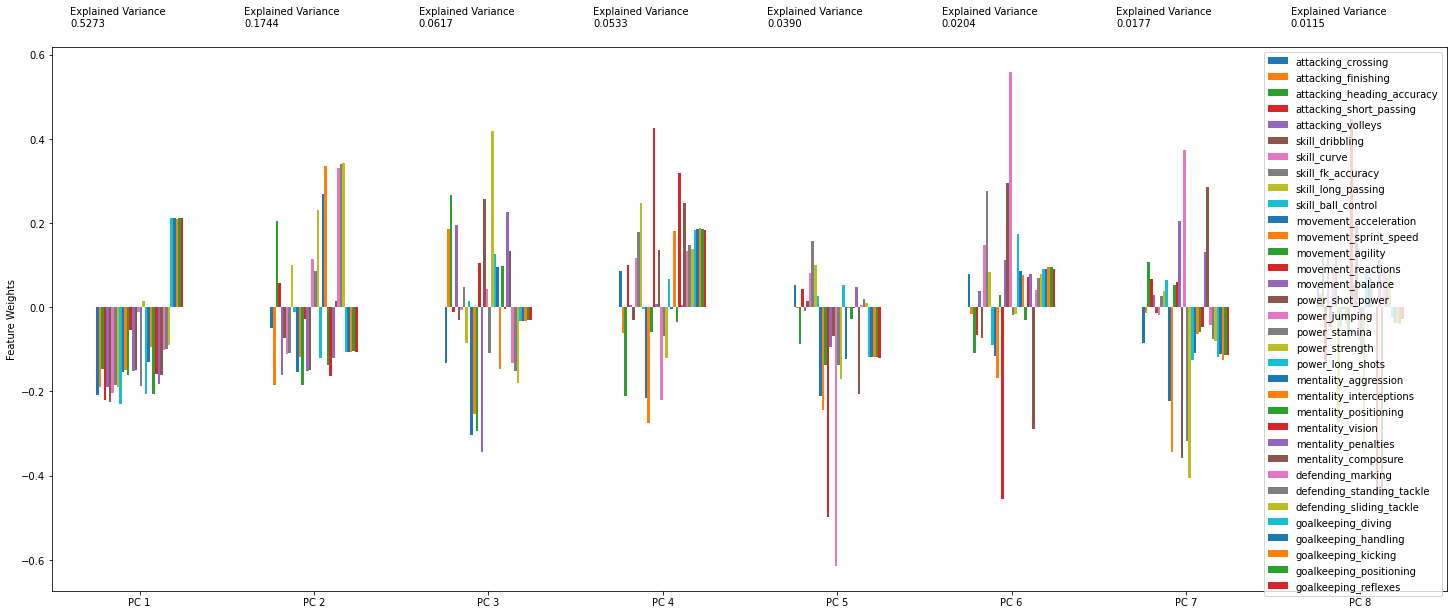

In [ ]:
fig, ax = plt.subplots(figsize = (25,10))

components.plot(ax = ax, kind = 'bar');
ax.set_ylabel("Feature Weights")
ax.set_xticklabels(dimensions, rotation=0)
plt.legend(loc='upper right')

# Display the explained variance ratios
for i, ev in enumerate(pca.explained_variance_ratio_):
  ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n%.4f"%(ev))


Aplicando Análisis de Silueta a los PC1 y PC2.

In [ ]:
pca2 = PCA(n_components=2).fit(scaled_skills_df)
reduced_data = pca2.transform(scaled_skills)
#reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])


Text(0.5, 1.0, 'Inertia of k-Means versus number of clusters')

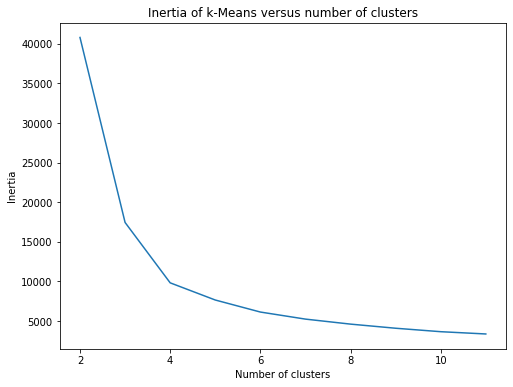

In [ ]:
#Prueba: para elegir el hiperparámetro n_clusters, variando de 2 a 11 clusters
scores = [KMeans(n_clusters=i+2).fit(reduced_data).inertia_ for i in range(10)]

plt.figure(figsize=(8,6))
plt.plot(np.arange(2, 12), scores)
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of k-Means versus number of clusters")

Puede decirse que el "codo" que indica el número óptimo de clusters está entre 3 o 4

In [ ]:
# Número de clusters buscado
n_clust = 4

km2 = KMeans(n_clusters=n_clust)
km2.fit(reduced_data)

# Recuperacion de etiquetas
clusters2 = km2.labels_
print('Suma de los cuadrados de las distancias al cluster / Inertia: ', km2.inertia_)

Suma de los cuadrados de las distancias al cluster / Inertia:  9821.299993976912


In [ ]:
def cluster(reduced_data,n_clusters):
    clusterer = KMeans(n_clusters=n_clusters, random_state=123).fit(reduced_data)    
    preds = clusterer.predict(reduced_data)
    centers = clusterer.cluster_centers_
    
    return preds, centers

def silhouette_scorer(reduced_data,n_clusters):
    preds,_= cluster(reduced_data,n_clusters)
    score = silhouette_score(reduced_data, preds)
    return score

for n_clusters in range(2,10):
    score = silhouette_scorer(reduced_data,n_clusters)
    print ("Silhoutte Score for {} cluster is {}".format(n_clusters,score))

Silhoutte Score for 2 cluster is 0.7421196955916226
Silhoutte Score for 3 cluster is 0.5350514372087962
Silhoutte Score for 4 cluster is 0.5177493189093147
Silhoutte Score for 5 cluster is 0.467520675016191
Silhoutte Score for 6 cluster is 0.4380583746160244
Silhoutte Score for 7 cluster is 0.41408160243163505
Silhoutte Score for 8 cluster is 0.4065595266871838
Silhoutte Score for 9 cluster is 0.41816686783647594


El análisis de Silueta determina que el número óptimo de clusters es 3.

A continuación graficamos la Silueta para 3 y 4 clusters.

For n_clusters = 3 The average silhouette_score is : 0.5348204732228447
For n_clusters = 4 The average silhouette_score is : 0.5177750808335644


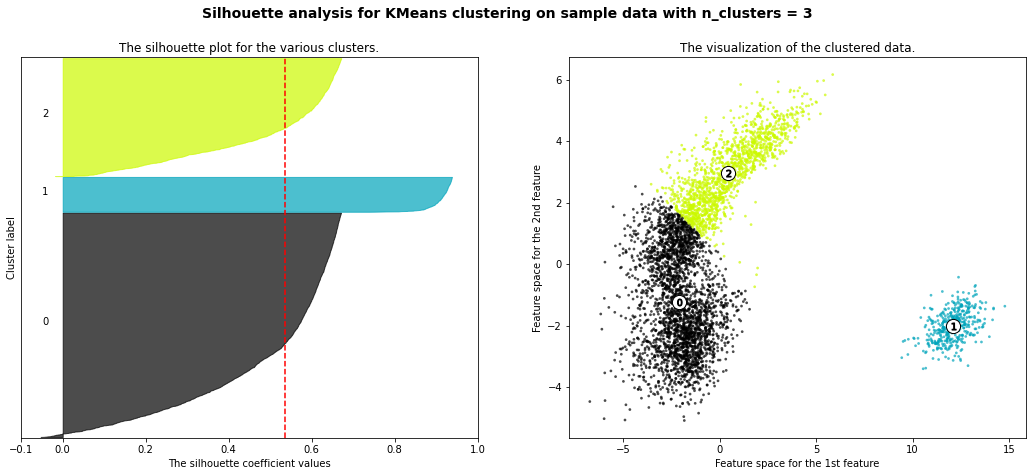

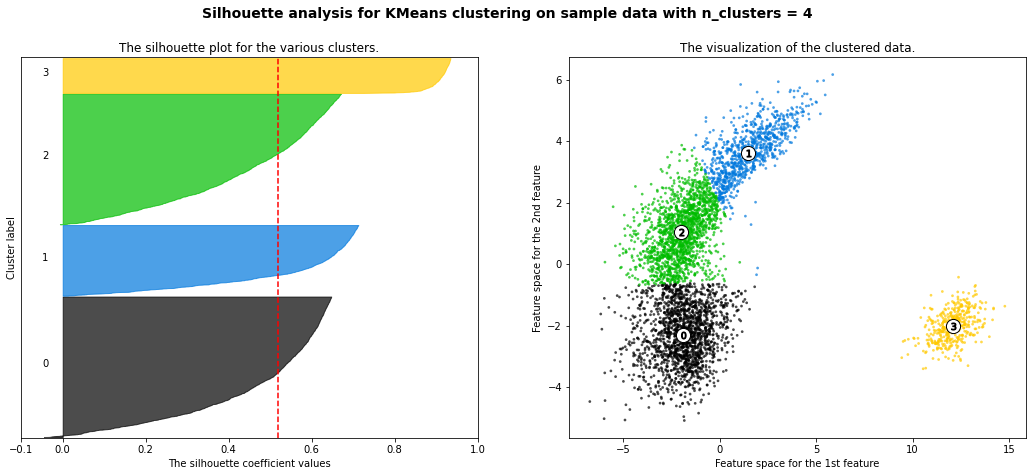

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

X= reduced_data

range_n_clusters = [3, 4]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

A nuestra interpretación, tomando 4 clusters se logran clusters más equilibrados en tamaño y todos muestran buena proporción de obsservaciones con valor de silueta superior al límite inferior deseado de 0.4.